# ECHO21
# &copy; 2024 Shikhar Mittal.

## Script to create some figures.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
np.seterr(all='ignore')

def Z2nu(Z):
    return 1420/Z

def nu2Z(nu):
    return 1420/nu

def plotter(x=None,y=None,xlog=True,ylog=False):
    '''
    This function will plots the quantity y w.r.t. x. 
    
    Arguments
    ---------
    
    x : float
        1+z
    
    y : dictionary
        Can be electron fraction ('xe'), volume-filling factor ('Q'), spin temperature ('Ts'), gas temperature ('Tk'), CMB temperature ('Tcmb'), or 21-cm signal ('T21').

    xlog : bool
        Set True if you want x axis to be in log scale otherwise false. Default is True.
        
    ylog : bool
        Set True if you want x axis to be in log scale otherwise false. Default is False.
    '''
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    fig,ax=plt.subplots(figsize=(8.3,7.2),dpi=300)
    fig.subplots_adjust(left=0.14, bottom=0.07, right=0.86, top=0.97)
    clr=['b','r','limegreen']
    linsty=['-','--',':']

    leng = len(y)
    keys = list(y.keys())
    
    if leng>1:
        for i in range(leng):
            if keys[i]=='Tk':
                lbl = r'$T_{\mathrm{k}}$'
            elif keys[i]=='Ts':
                lbl = r'$T_{\mathrm{s}}$'
            elif keys[i]=='Tcmb':
                lbl = r'$T_{\mathrm{cmb}}$'
            else:
                print('Error: provide only similar quantities in the dictionary.')
                sys.exit()
            ax.plot(x,y[keys[i]],color=clr[i],ls=linsty[i],label=lbl)
            
        if keys[0]=='Tk' or keys[0]=='Ts' or keys[0]=='Tcmb':
            ax.set_ylabel(r'$T\,$(K)',fontsize=20)
        elif keys[0]=='xk' or keys[0]=='xa':
            ax.set_ylabel('Couplings',fontsize=20)
        ax.legend(fontsize=18,frameon=False)
    else:
        key = keys[0]
        ax.plot(x,y[key],'b')
        if key=='Tk':
            ax.set_ylabel(r'$T_{\mathrm{k}}\,$(K)',fontsize=20)
        elif key=='Tcmb':
            ax.set_ylabel(r'$T_{\mathrm{cmb}}\,$(K)',fontsize=20)
        elif key=='Ts':
            ax.set_ylabel(r'$T_{\mathrm{s}}\,$(K)',fontsize=20)
        elif key=='xk':
            ax.set_ylabel(r'$x_{\mathrm{k}}$',fontsize=20)
        elif key=='xa':
            ax.set_ylabel(r'$x_{\alpha}$',fontsize=20)
        elif key=='xe':
            ax.set_ylabel(r'$x_{\mathrm{e}}$',fontsize=20)
        elif key=='Q':
            ax.axhline(y=0.5,ls='--',color='r',label=r'50\% reionisation')
            ax.axhline(y=1,ls=':',color='limegreen',label=r'100\% reionisation')
            ax.set_ylabel(r'$Q$',fontsize=20)
            ax.legend(fontsize=16,frameon=False,loc=0)
        elif key=='T21':
            secax = ax.secondary_xaxis('top', functions=(Z2nu,nu2Z))
            secax.set_xlabel(r'$\nu\,(\mathrm{MHz})$',fontsize=20, labelpad=12)
            secax.minorticks_on()
            secax.tick_params(axis='x',which='major', length=5, width=1, labelsize=20,direction='in')
            secax.tick_params(axis='x',which='minor', length=3, width=1, direction='in')
            ax.axhline(y=0,ls=':',color='k')
            ax.set_ylabel(r'$T_{21}\,$(mK)',fontsize=20)
        else:
            print('Error: unknown quantity provided.')
            sys.exit()

    if xlog==True:
        ax.set_xscale('log')
    if ylog==True:
        ax.set_yscale('log')
    
    ax.set_xlabel(r'$1+z$',fontsize=20)    
    ax.tick_params(axis='both', which='major', length=5, width=1, labelsize=20,direction='in',pad=10)
    ax.tick_params(axis='both', which='minor', length=3, width=1, direction='in')
    ax.minorticks_on()
    
    xhigh = math.ceil(x[0] / 10.0) * 10
    if x[-1]<10:
        xlow = math.floor(x[-1])
    else:
        xlow = math.floor(x[-1] / 10.0) * 10
    
    ax.set_xlim([xlow,xhigh])
    ax.invert_xaxis()
    ax.yaxis.set_ticks_position('both')
    if keys[0]!='T21':
        ax.xaxis.set_ticks_position('both')
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.show()
    return

## Enter the path to output folder

In [35]:
output = '/home/sm2941/work/test_echo21/output_20241209-134242/'
#output = '/mnt/d/test_echo21/fiducial/'

## Load the redshifts

In [36]:
one_plus_z = np.load(output+'one_plus_z.npy')

## Plot bulk electron fraction, $x_{\mathrm{e}}$

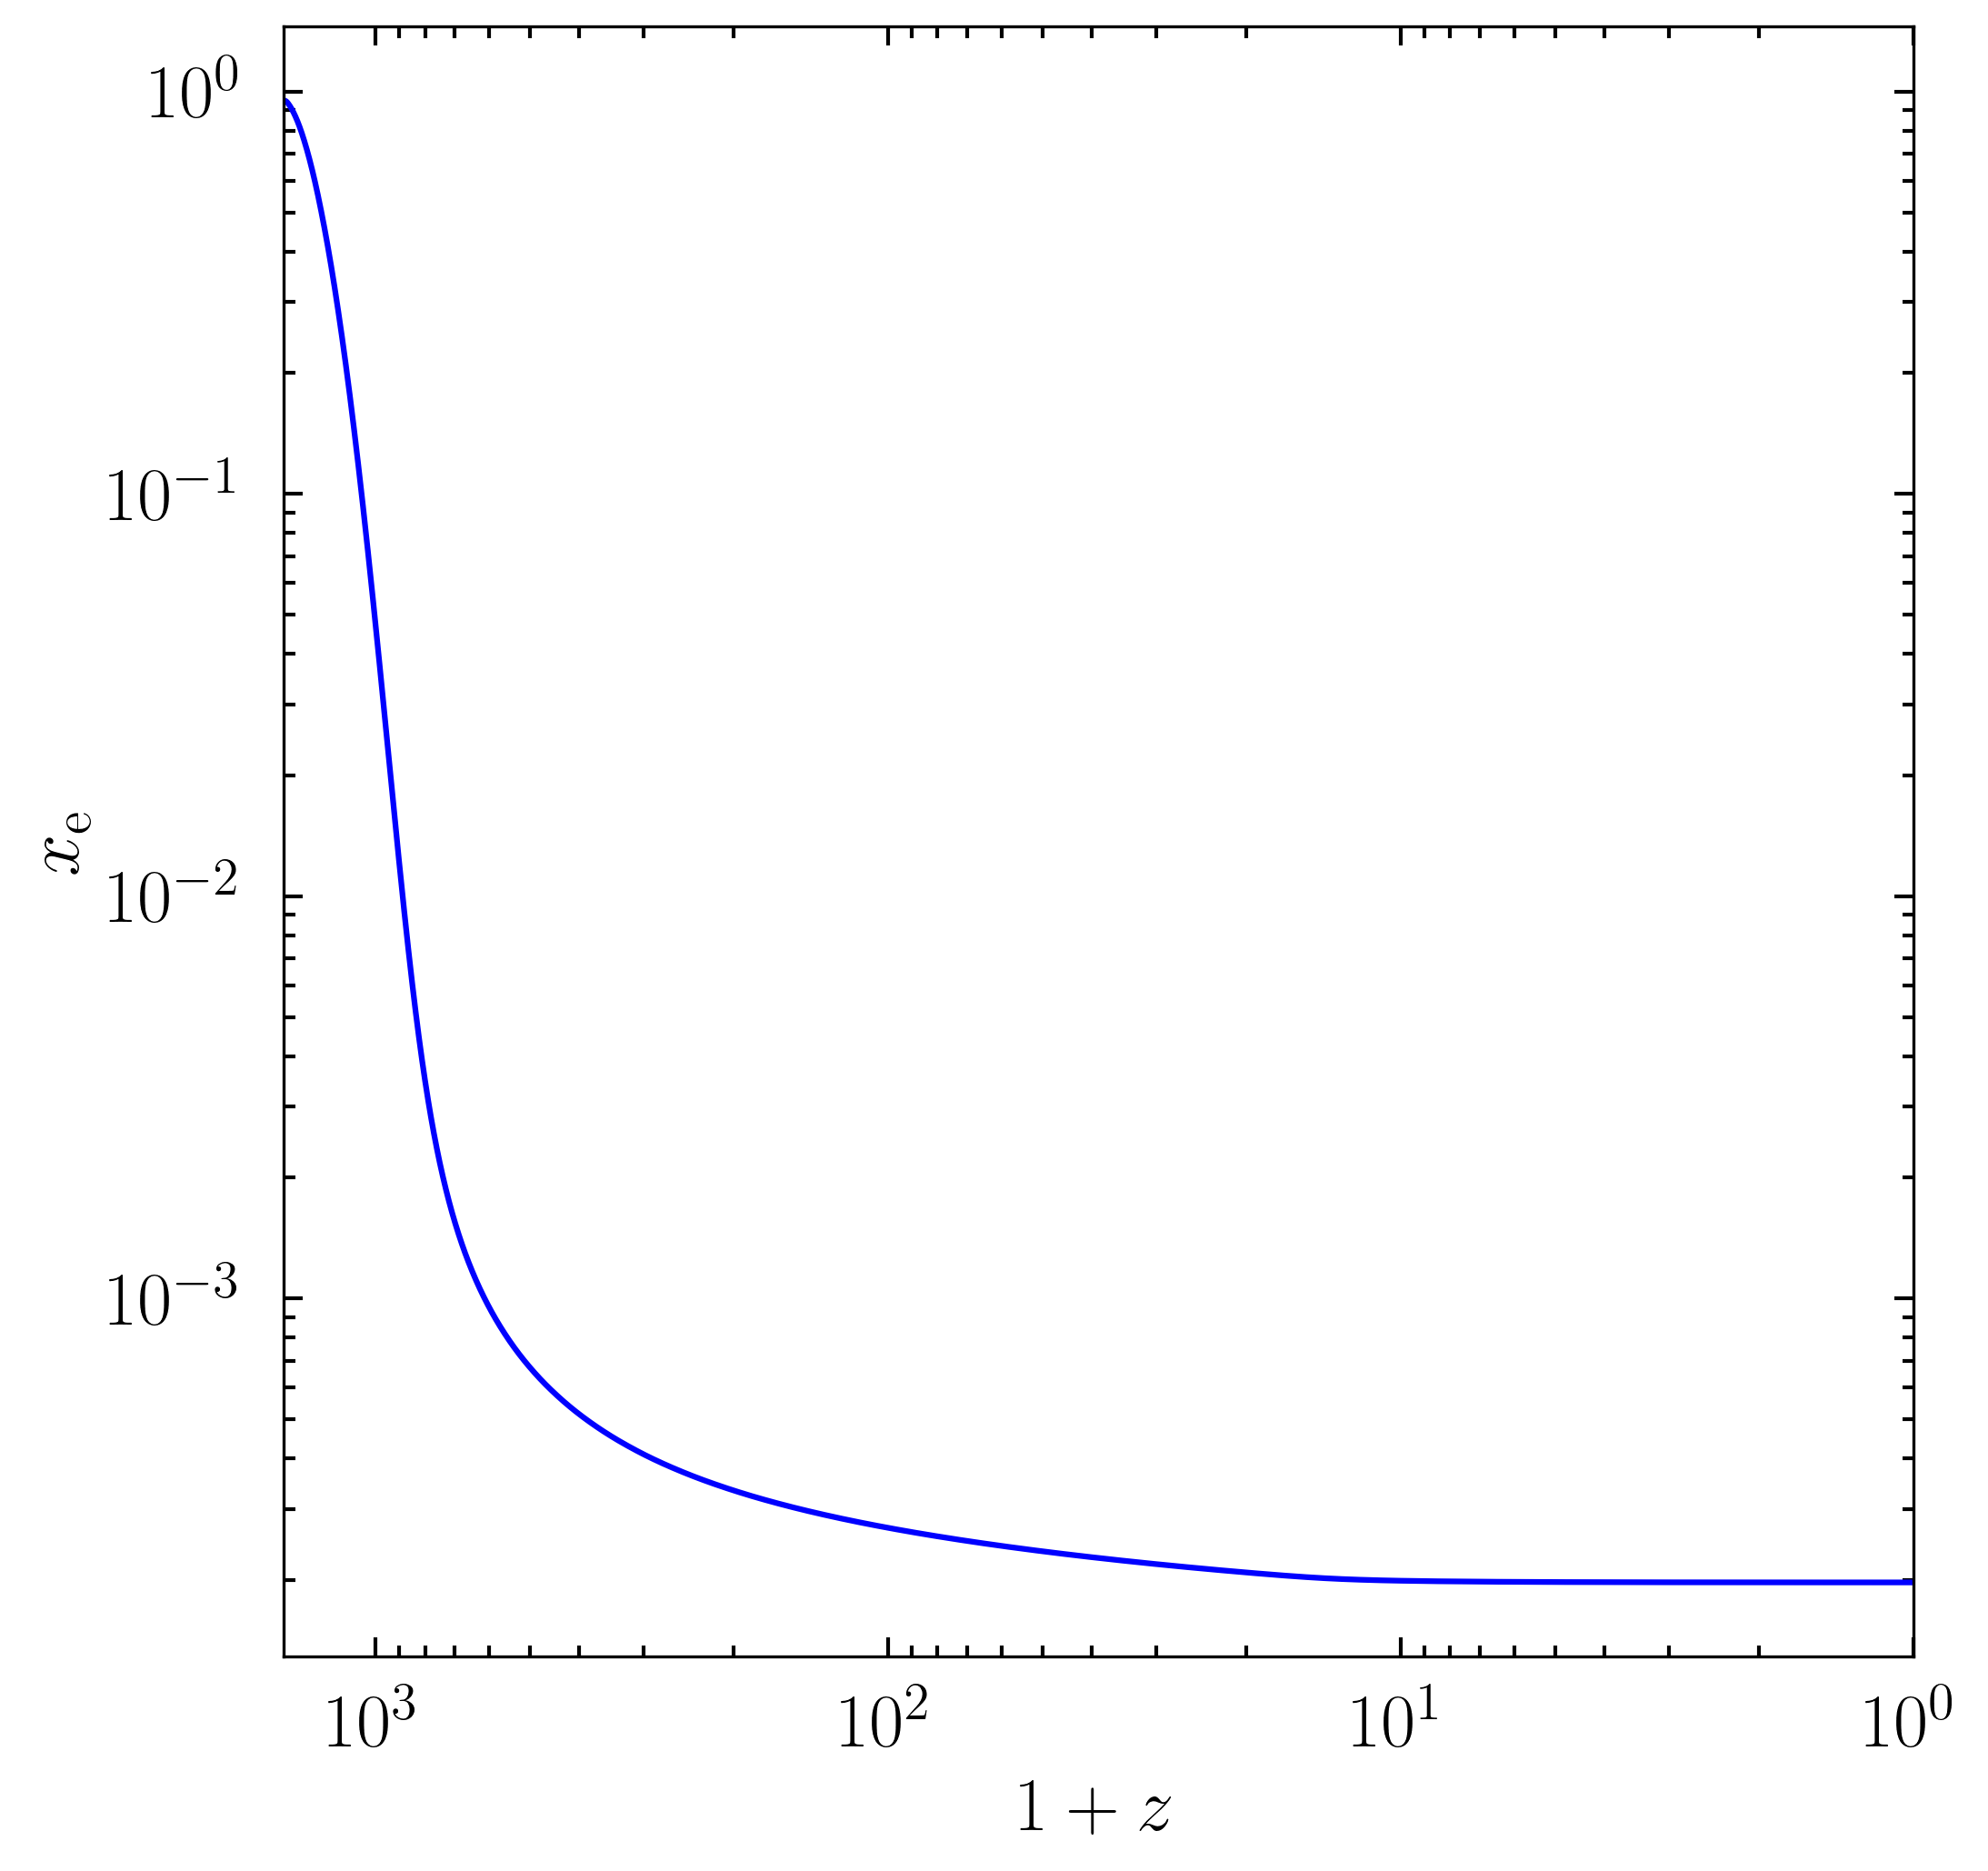

In [26]:
xe = np.load(output+'xe.npy')
plotter(x=one_plus_z,y={'xe':xe},xlog=True,ylog=True)

## Plot volume-filling factor, $Q$ (signature of reionisation)

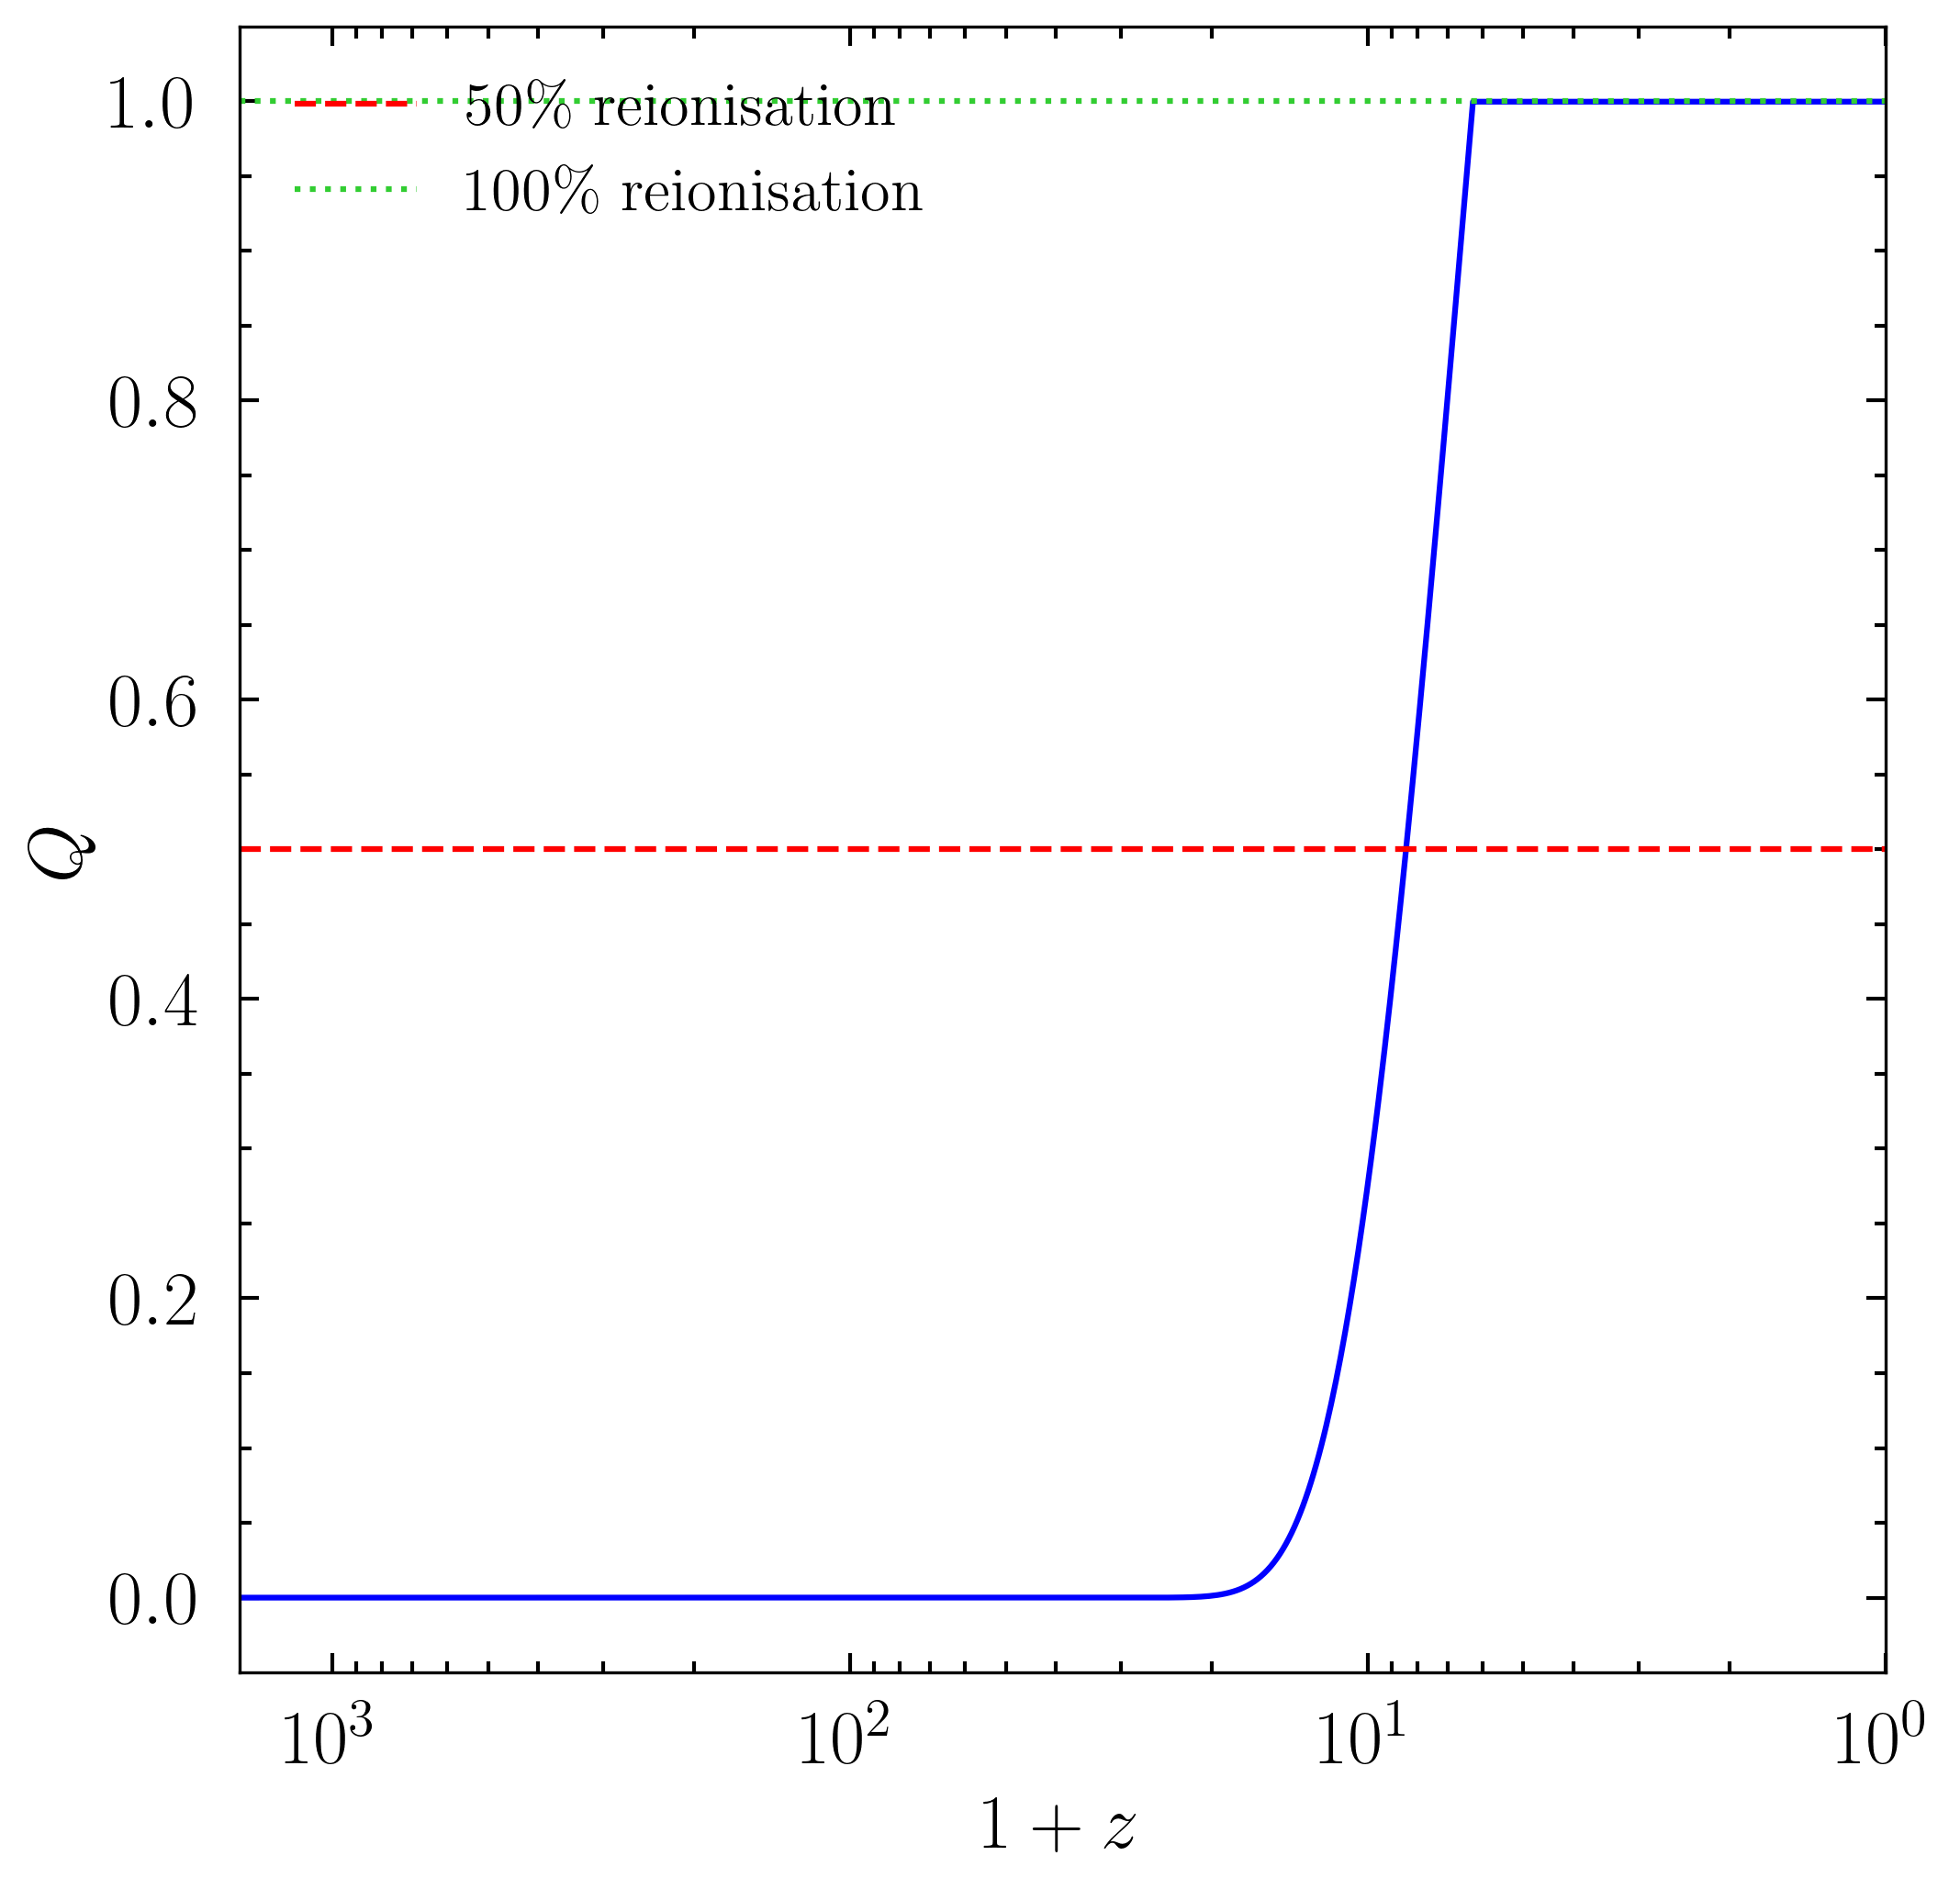

In [37]:
Q = np.load(output+'Q.npy')
plotter(x=one_plus_z,y={'Q':Q},xlog=True,ylog=False)

## Plot gas, spin and CMB temperature

Load the temperatures

In [28]:
Tk = np.load(output+'Tk.npy')
Ts = np.load(output+'Ts.npy')
Tcmb = np.load(output+'Tcmb.npy')

Now plot them

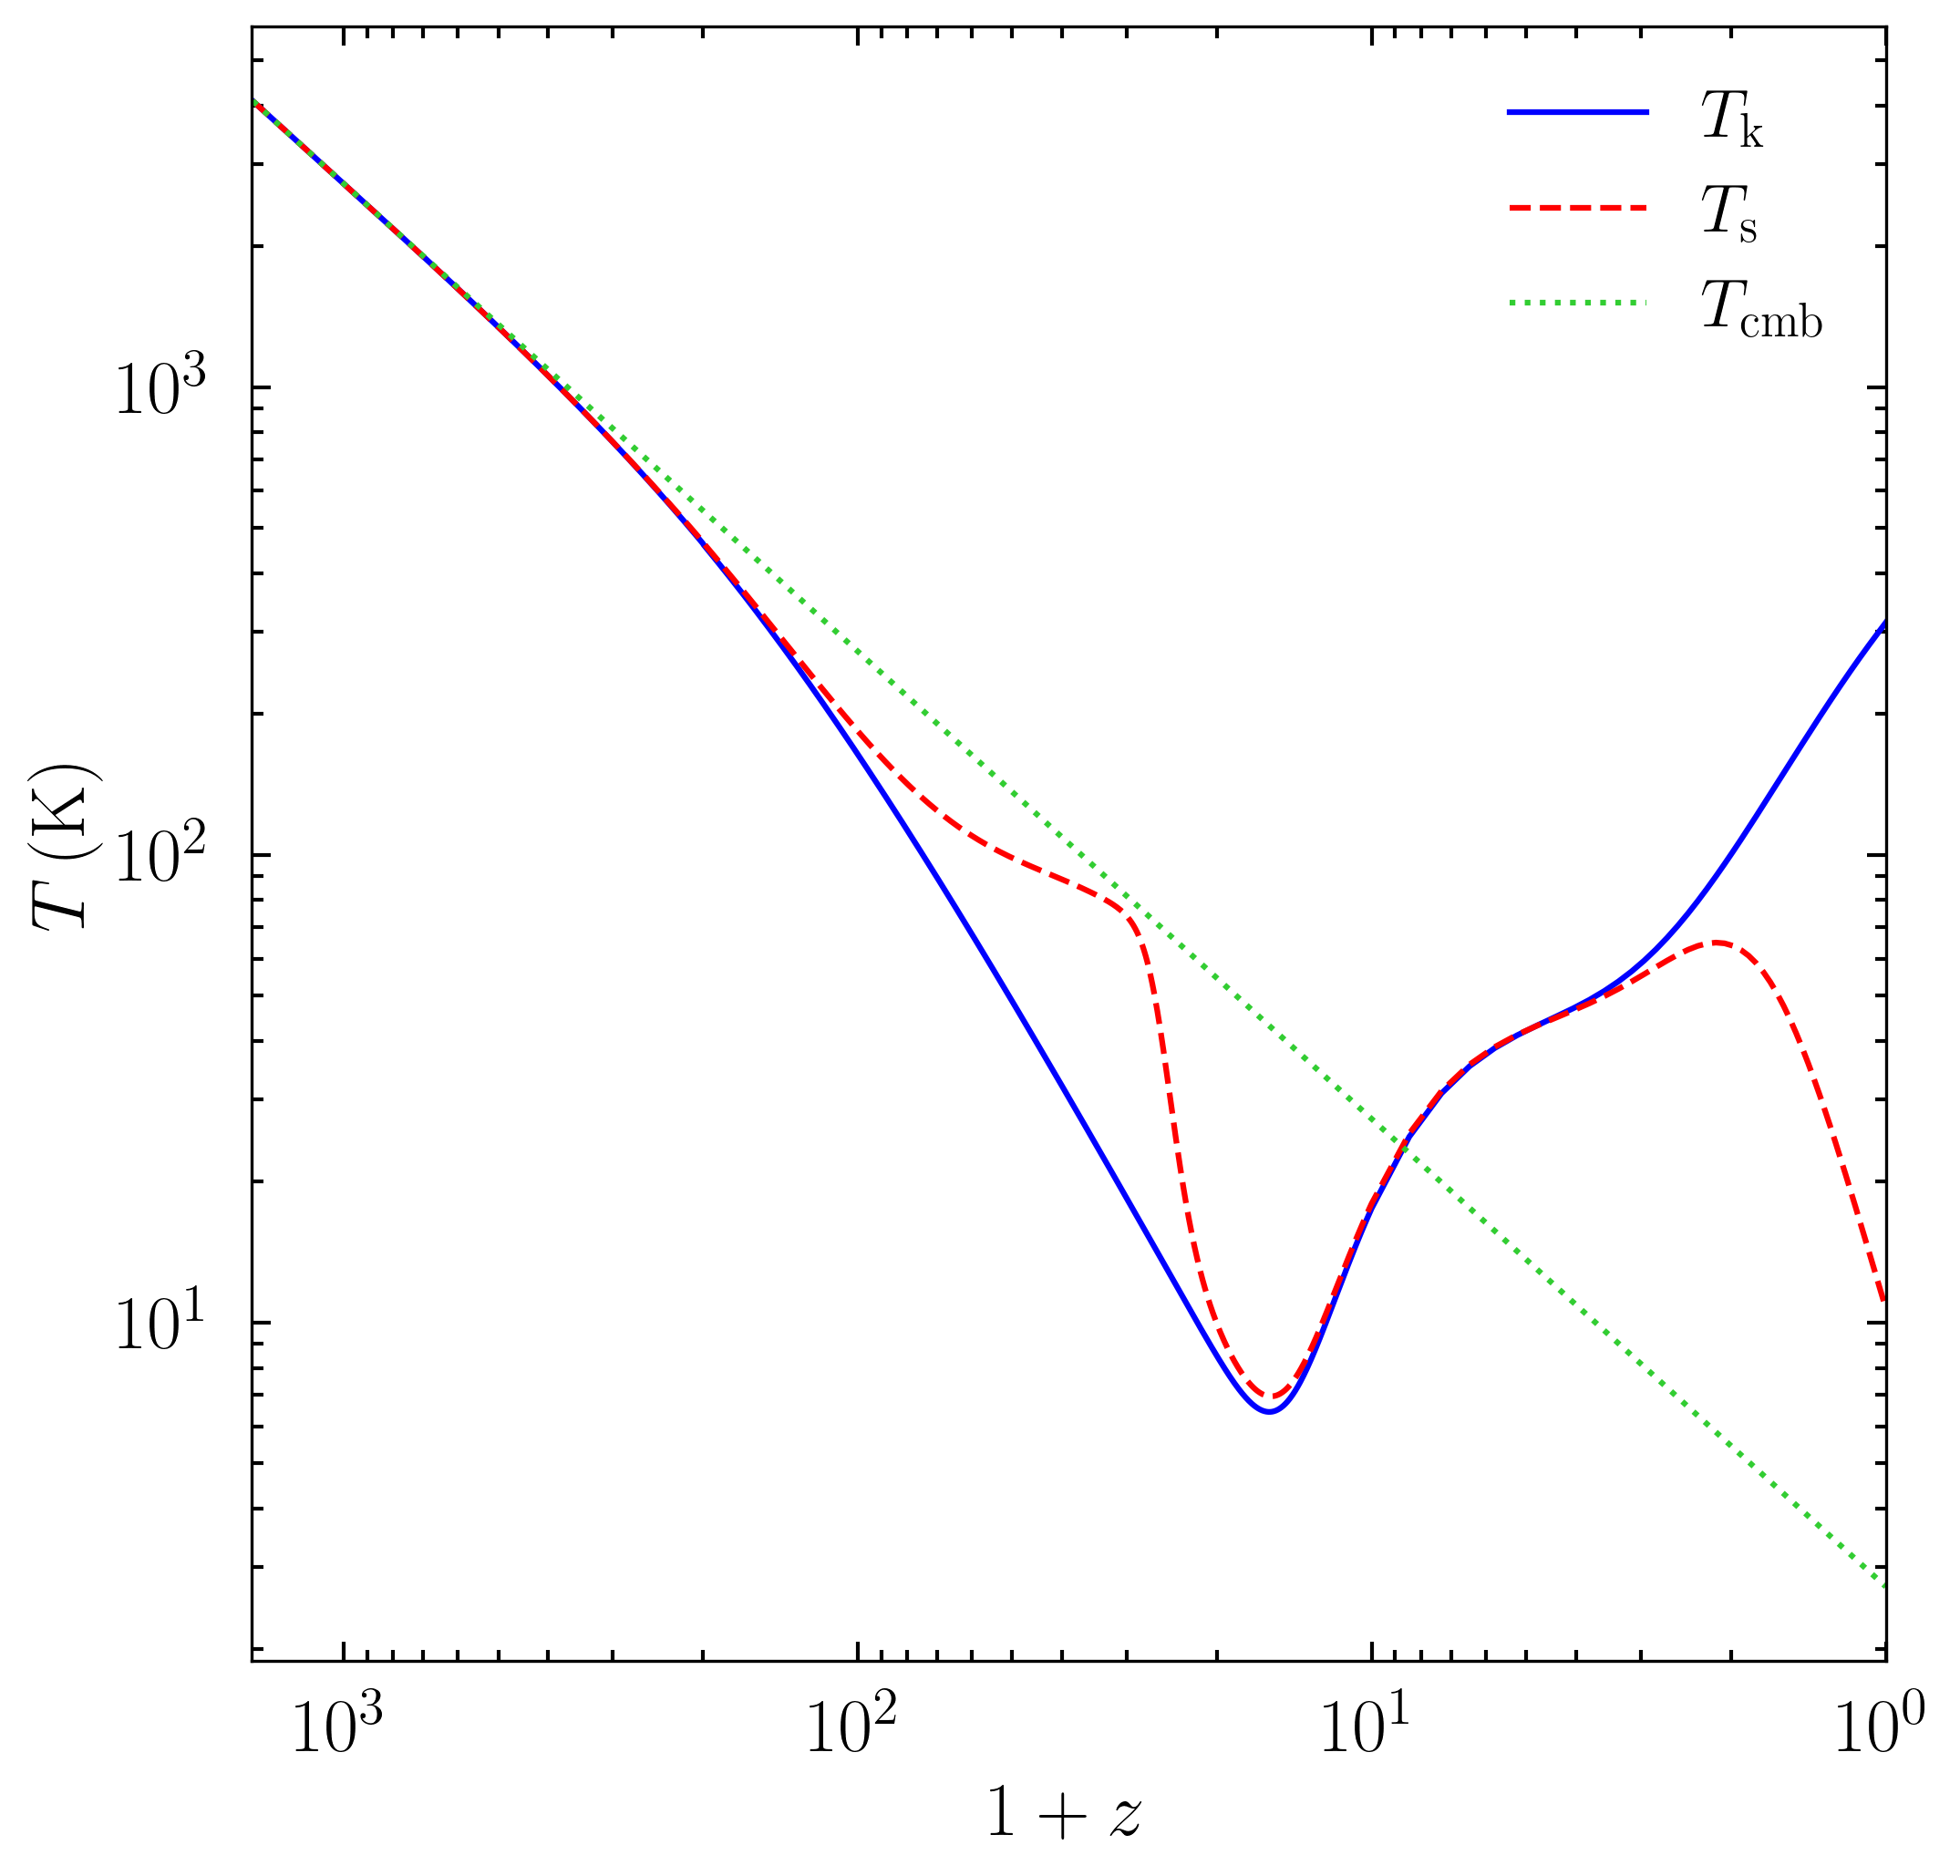

In [29]:
plotter(x=one_plus_z,y={'Tk':Tk,'Ts':Ts,'Tcmb':Tcmb},xlog=True,ylog=True)

## Finally, we plot the global 21-cm signal, $T_{21}$

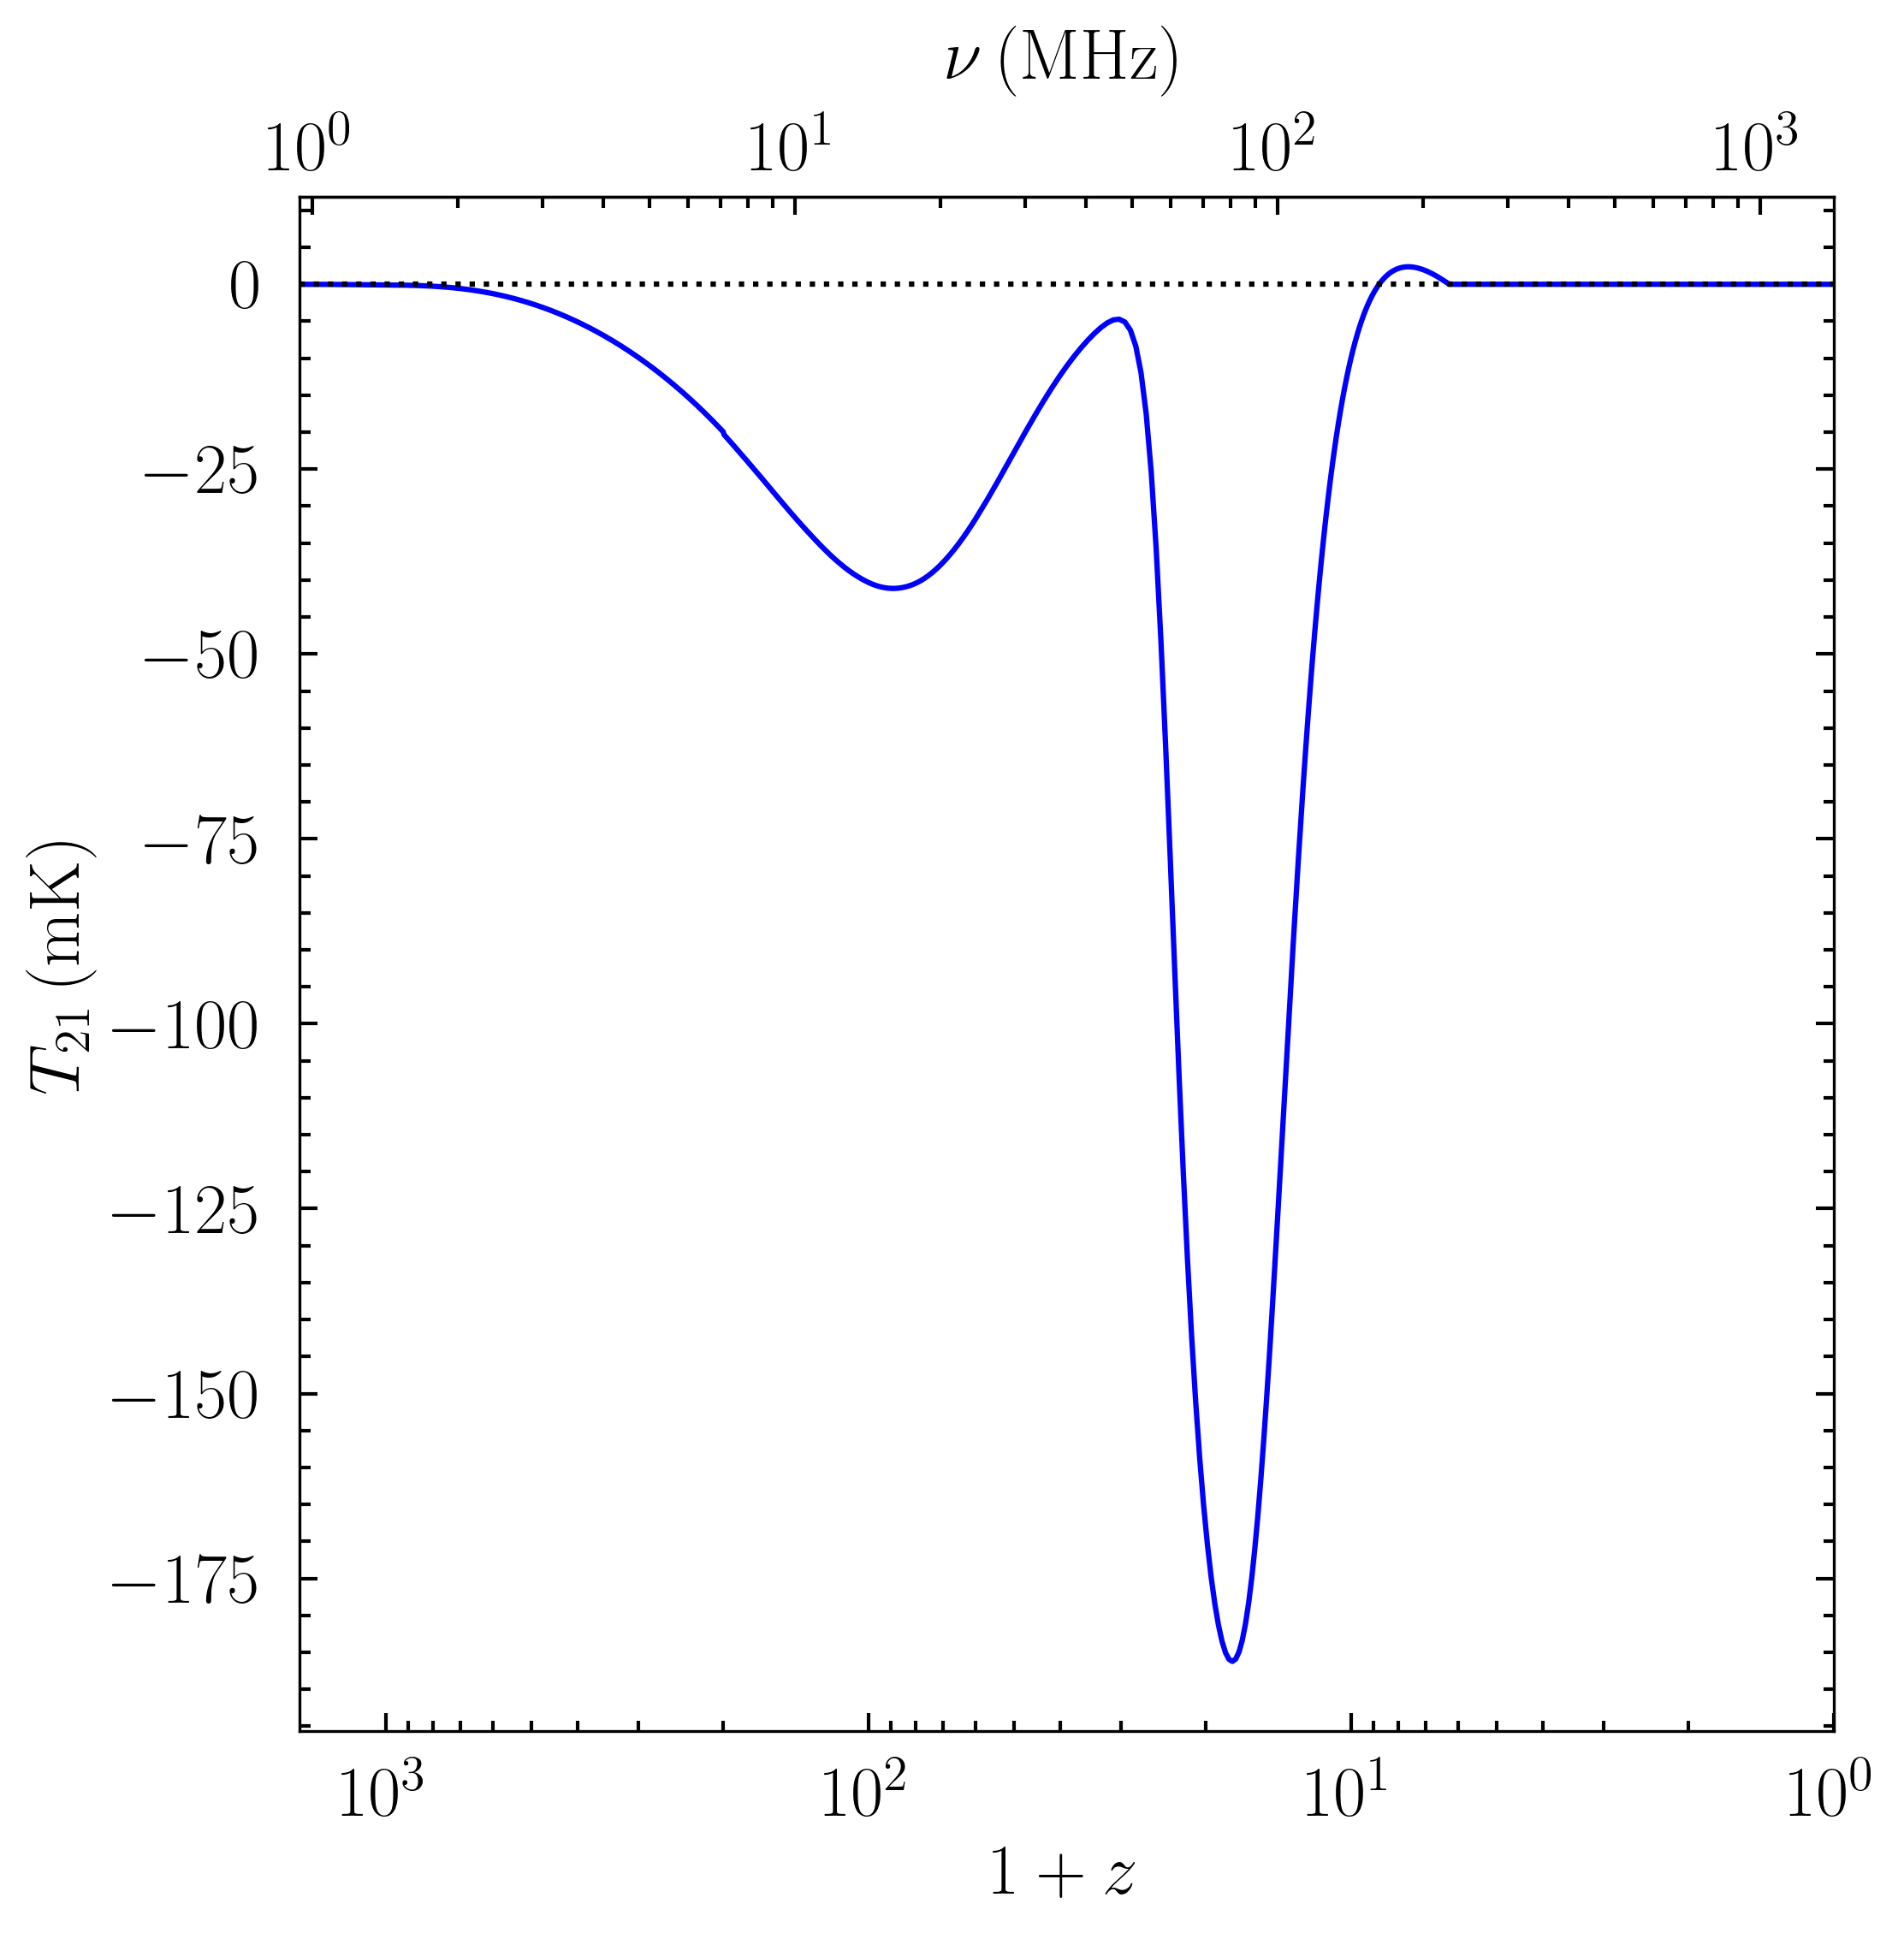

In [38]:
T21 = np.load(output+'T21.npy')
plotter(x=one_plus_z,y={'T21':T21})